In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\şerefcanmemiş\Downloads\water_potability.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data_null = (df.isna().sum()/len(df))*100
data_null = data_null.to_frame()
data_null


,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [6]:
import missingno as msn
import plotly.express as px

<Axes: >

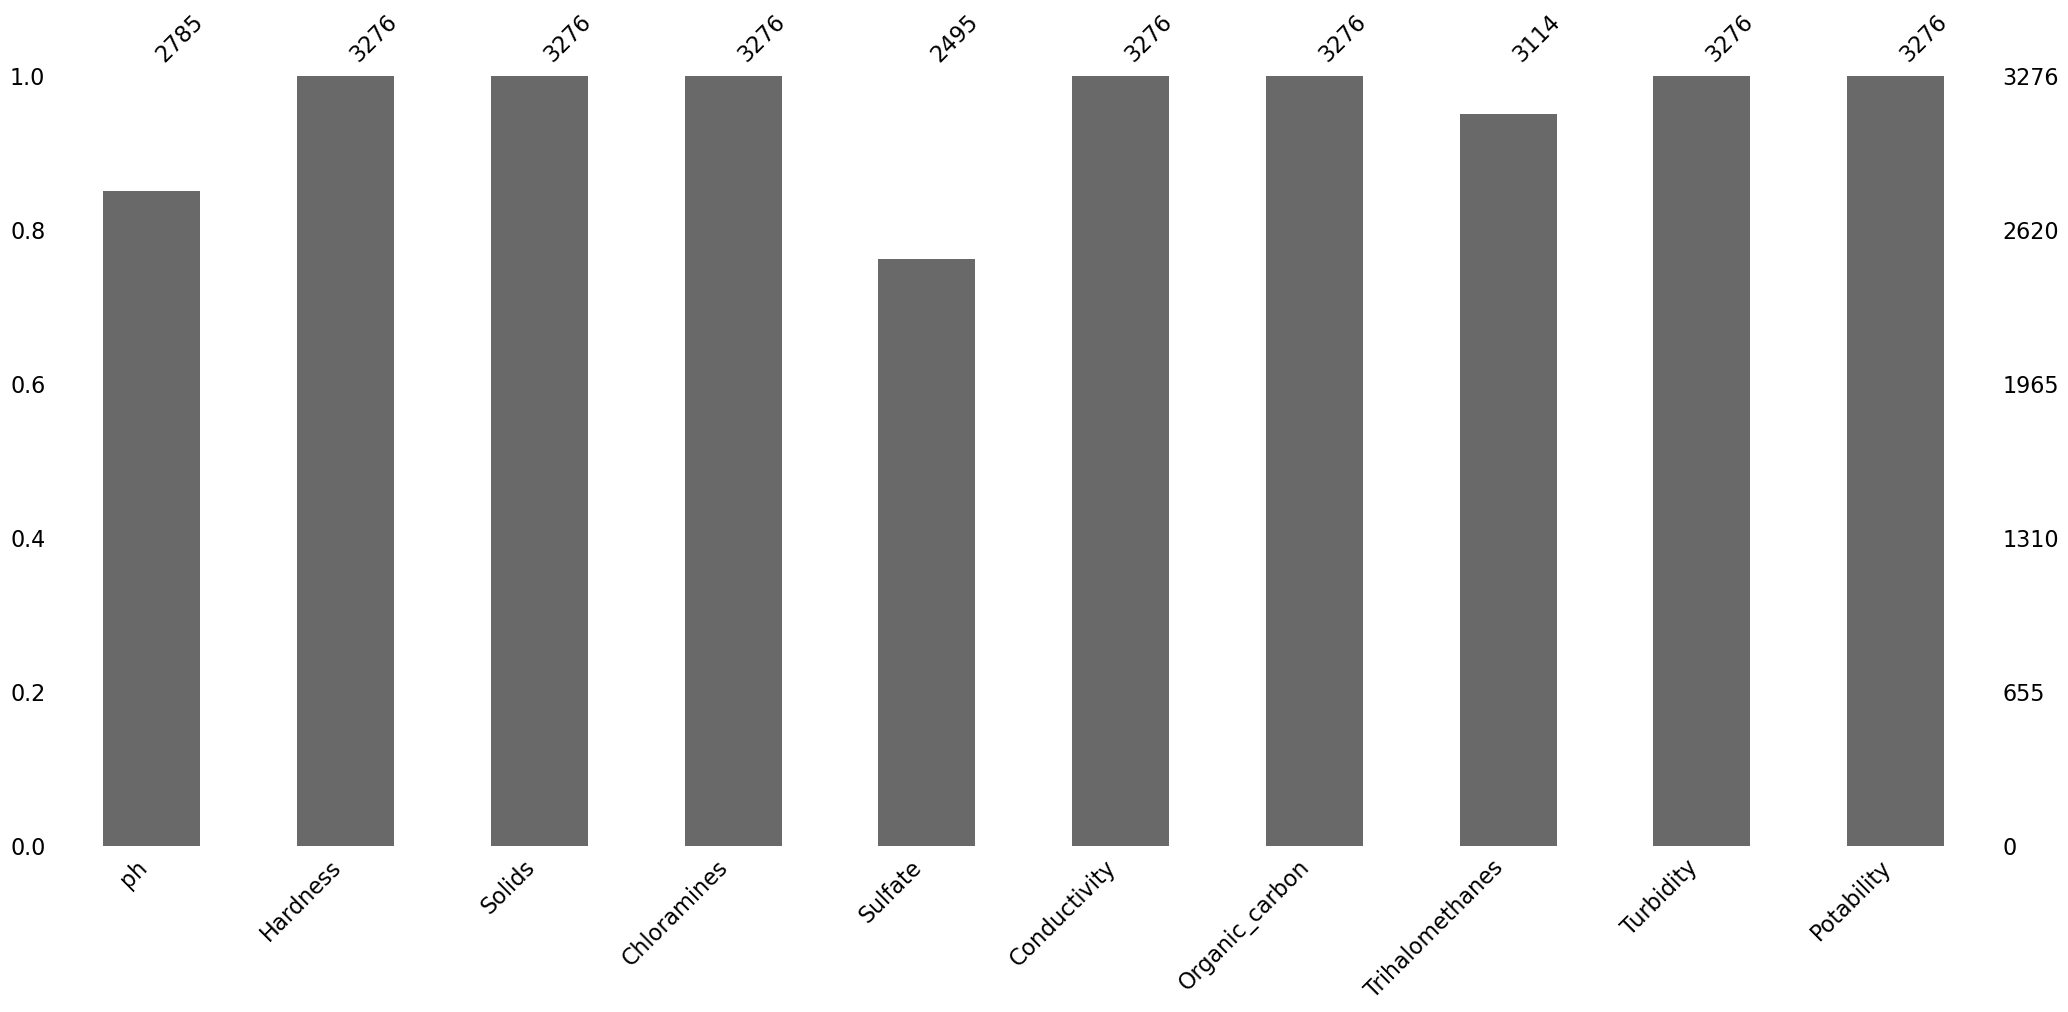

In [7]:
# it is used to show na values
msn.bar(df)

In [8]:
# unique values in data
for i in df.columns:
    print(i,':', df[i].nunique())

ph : 2785
Hardness : 3276
Solids : 3276
Chloramines : 3276
Sulfate : 2495
Conductivity : 3276
Organic_carbon : 3276
Trihalomethanes : 3114
Turbidity : 3276
Potability : 2


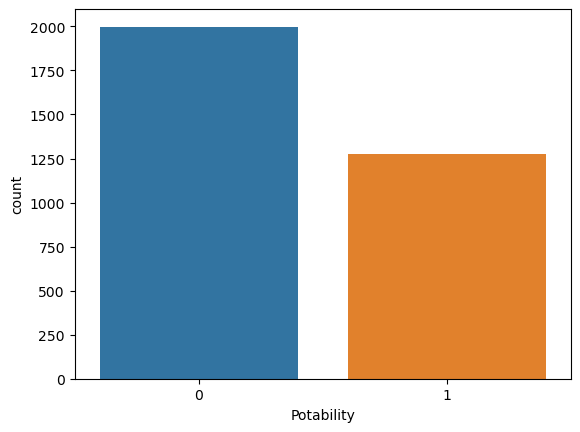

In [9]:
sns.countplot(data=df, x='Potability')
plt.show()

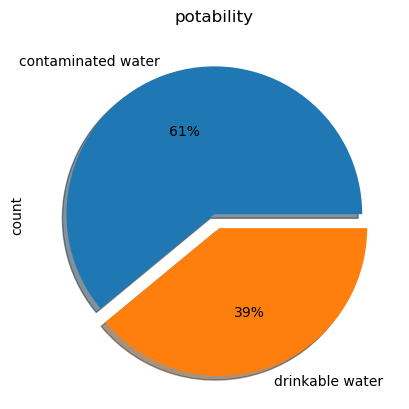

In [10]:
plt.title('potability')
df['Potability'].value_counts().plot.pie(explode=(0,0.1),autopct='%.0f%%',shadow=True,labels=('contaminated water','drinkable water'))
plt.show()


In [11]:
x =df.iloc[:,:-1]
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


In [12]:
y = df['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [13]:
X =x.copy()
Y =y.copy()

In [14]:
ph_mean= df['ph'].mean()
X['ph'].fillna(ph_mean, inplace=True)

Sulfate_mean= df['Sulfate'].mean()
X['Sulfate'].fillna(Sulfate_mean, inplace=True)

Trihalomethanes_mean= df['Trihalomethanes'].mean()
X['Trihalomethanes'].fillna(Trihalomethanes_mean, inplace=True)


In [15]:
from imblearn.over_sampling import SMOTE
# used to handle imbalanced data

smote = SMOTE(sampling_strategy='auto',random_state=42)
x_resampled, y_resampled = smote.fit_resample(X,Y)

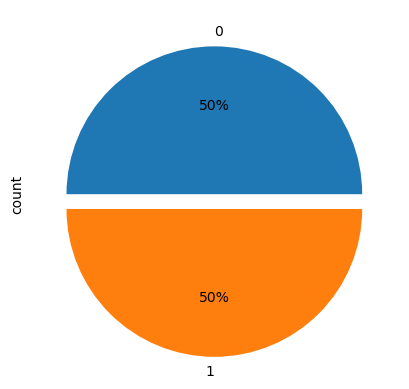

In [16]:

y_resampled.value_counts().plot.pie(explode=(0,0.1),autopct='%.0f%%')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=LR.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6280487804878049

In [22]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
y_pred_knn=knn.predict(x_test)

In [25]:
accuracy=accuracy_score(y_test,y_pred_knn)
accuracy

0.6585365853658537